# #ACM RECRUITMENT ROUND 2:

###NAME                : THACKSHANARAMANA B
###REG NO              : RA2311047010182
###YEAR                : 2
### DEPARTMENT/BRANCH   : CINTEL/AI

1. Using the provided cyberbullying dataset, preprocess the data and build a multi-label classification model to categorize text into various types of cyberbullying (e.g., hate speech, offensive language). Your objective is to clean the data, perform text preprocessing (such as tokenization, lemmatization, and vectorization), and implement a classification model using techniques like Logistic Regression or a simple Neural Network. Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score. Document your entire process in a Jupyter notebook and upload it to a GitHub repository for evaluation.

**bold text**

In [ ]:
# 1. LOADING AND INSPECTING THE DATASET
import pandas as pd

# Load the dataset (replace with actual file path)
df = pd.read_csv('/content/final_hateXplain.csv')

# Inspect the dataset
print(df.head())
print(df.columns)

# Output the relevant columns: 'comment' is the text column, and 'label', 'Race', etc. are the target columns.


                                             comment       label     Race  \
0                     0 u0 lmao wow fuck you too 😂 😂      normal  No_race   
1  1 0 th floor maybe wow cnn with the fakenews t...   offensive  No_race   
2  1 0 yrs <number> white women raped by niggers ...  hatespeech  African   
3  1 2 h ago ching chong accepted your friend req...   offensive    Asian   
4  1 8 th century mayhem and lawlessness had noth...      normal  No_race   

       Religion     Gender Sexual Orientation Miscellaneous  
0  Nonreligious  No_gender     No_orientation           NaN  
1  Nonreligious  No_gender     No_orientation         Other  
2  Nonreligious  No_gender     No_orientation           NaN  
3  Nonreligious  No_gender     No_orientation           NaN  
4  Nonreligious  No_gender     No_orientation           NaN  
Index(['comment', 'label', 'Race', 'Religion', 'Gender', 'Sexual Orientation',
       'Miscellaneous'],
      dtype='object')


In [ ]:
# 2. DATA PREPROCESSING
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and preprocess the text
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I | re.A)

    # Tokenize text
    tokens = nltk.word_tokenize(text)

    # Lemmatize and remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]

    return ' '.join(tokens)

# Apply the preprocessing to the 'comment' column
df['clean_text'] = df['comment'].apply(preprocess_text)

# Check the cleaned text
print(df[['comment', 'clean_text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                             comment  \
0                     0 u0 lmao wow fuck you too 😂 😂   
1  1 0 th floor maybe wow cnn with the fakenews t...   
2  1 0 yrs <number> white women raped by niggers ...   
3  1 2 h ago ching chong accepted your friend req...   
4  1 8 th century mayhem and lawlessness had noth...   

                                          clean_text  
0                                    u lmao wow fuck  
1  th floor maybe wow cnn fakenews body count goi...  
2  yr number white woman raped nigger number negr...  
3          h ago ching chong accepted friend request  
4  th century mayhem lawlessness nothing loud mou...  


In [ ]:
# 3. TEXT VECTORIZATION (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features

# Fit and transform the cleaned text
X = tfidf.fit_transform(df['clean_text']).toarray()

# Check the shape of the feature matrix
print("Shape of X (TF-IDF):", X.shape)


Shape of X (TF-IDF): (20109, 5000)


In [ ]:
# 4. MULTI-LABEL TARGET PREPARATION
# One-hot encode the target columns
y = pd.get_dummies(df[['label', 'Race', 'Religion', 'Gender', 'Sexual Orientation', 'Miscellaneous']])

# Check the shape of the target matrix
print("Shape of y (multi-label targets):", y.shape)


Shape of y (multi-label targets): (20109, 30)


In [ ]:
# 5. TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16087, 5000)
X_test shape: (4022, 5000)
y_train shape: (16087, 30)
y_test shape: (4022, 30)


In [ ]:
# 6. MODEL BUILDING: LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Initialize the OneVsRestClassifier with Logistic Regression as the base model
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
# 7. MODEL EVALUATION
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model with accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.24888115365489807
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.55      0.66      1325
           1       0.67      0.62      0.65      1502
           2       0.64      0.22      0.33      1195
           3       0.85      0.54      0.66       778
           4       0.76      0.13      0.22       254
           5       0.75      0.18      0.29        66
           6       0.42      0.07      0.12       161
           7       0.82      0.12      0.21        73
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         8
          10       0.81      0.95      0.87      2676
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00        31
          13       0.00      0.00      0.00         8
          14       0.78      0.44      0.56       523
          15       0.88      0.54      0.67       384
          16       0.90     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Data Shape: (20109, 7)
Column Names: Index(['comment', 'label', 'Race', 'Religion', 'Gender', 'Sexual Orientation',
       'Miscellaneous'],
      dtype='object')
                                             comment       label     Race  \
0                     0 u0 lmao wow fuck you too 😂 😂      normal  No_race   
1  1 0 th floor maybe wow cnn with the fakenews t...   offensive  No_race   
2  1 0 yrs <number> white women raped by niggers ...  hatespeech  African   
3  1 2 h ago ching chong accepted your friend req...   offensive    Asian   
4  1 8 th century mayhem and lawlessness had noth...      normal  No_race   

       Religion     Gender Sexual Orientation Miscellaneous  
0  Nonreligious  No_gender     No_orientation           NaN  
1  Nonreligious  No_gender     No_orientation         Other  
2  Nonreligious  No_gender     No_orientation           NaN  
3  Nonreligious  No_gender     No_orientation           NaN  
4  Nonreligious  No_gender     No_orientation           NaN  
Mi

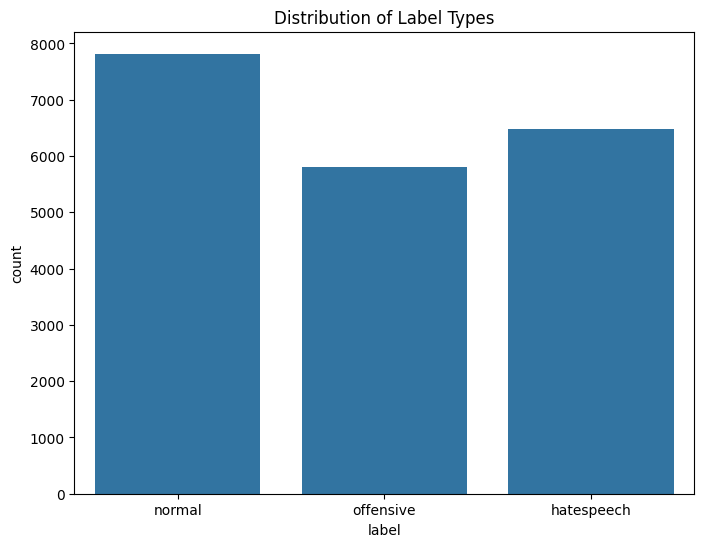

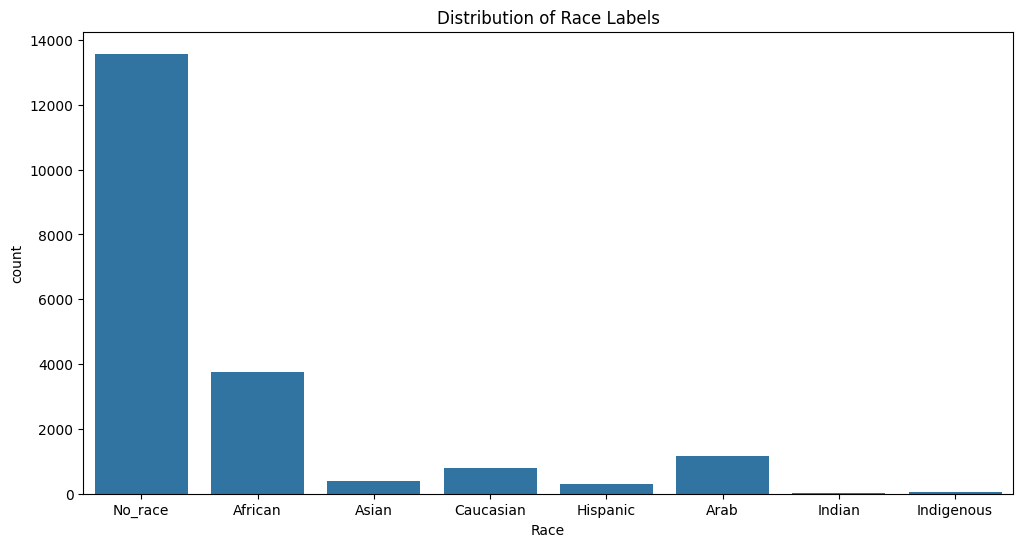

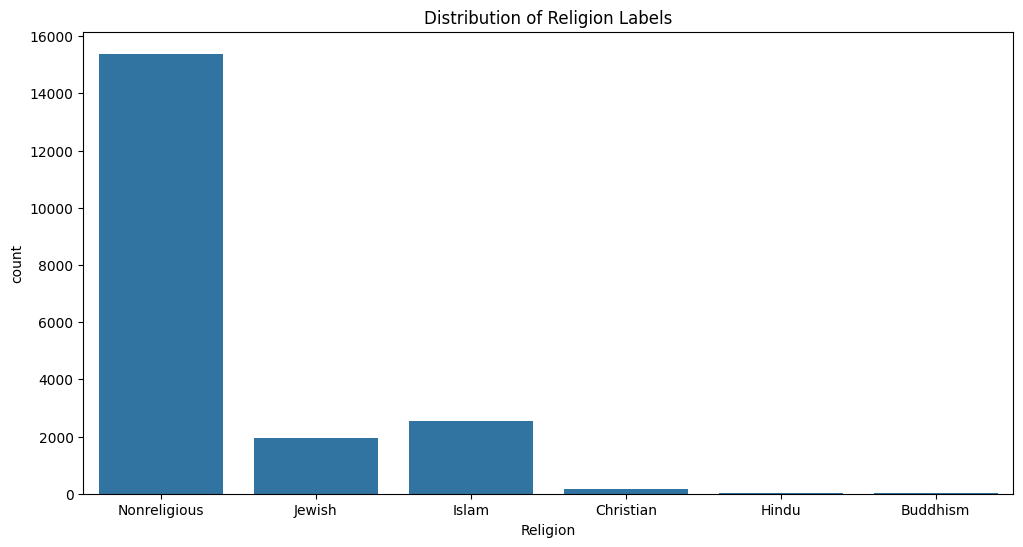

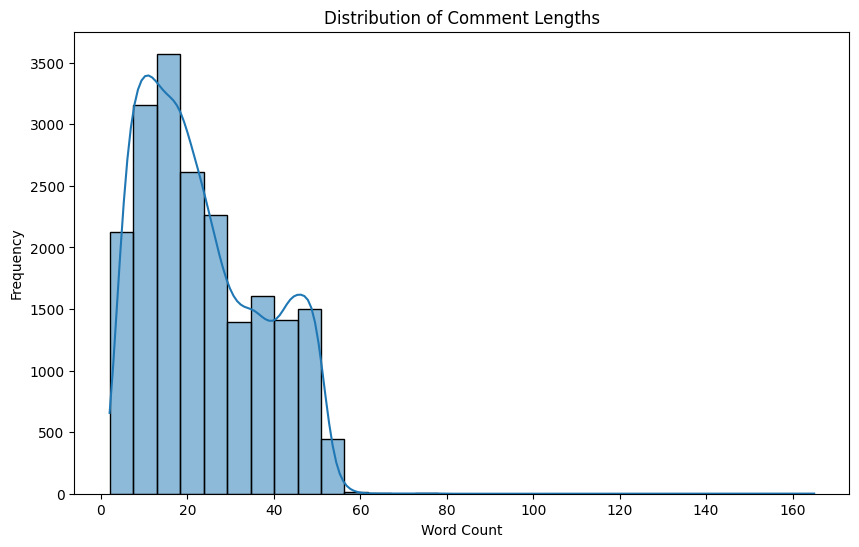

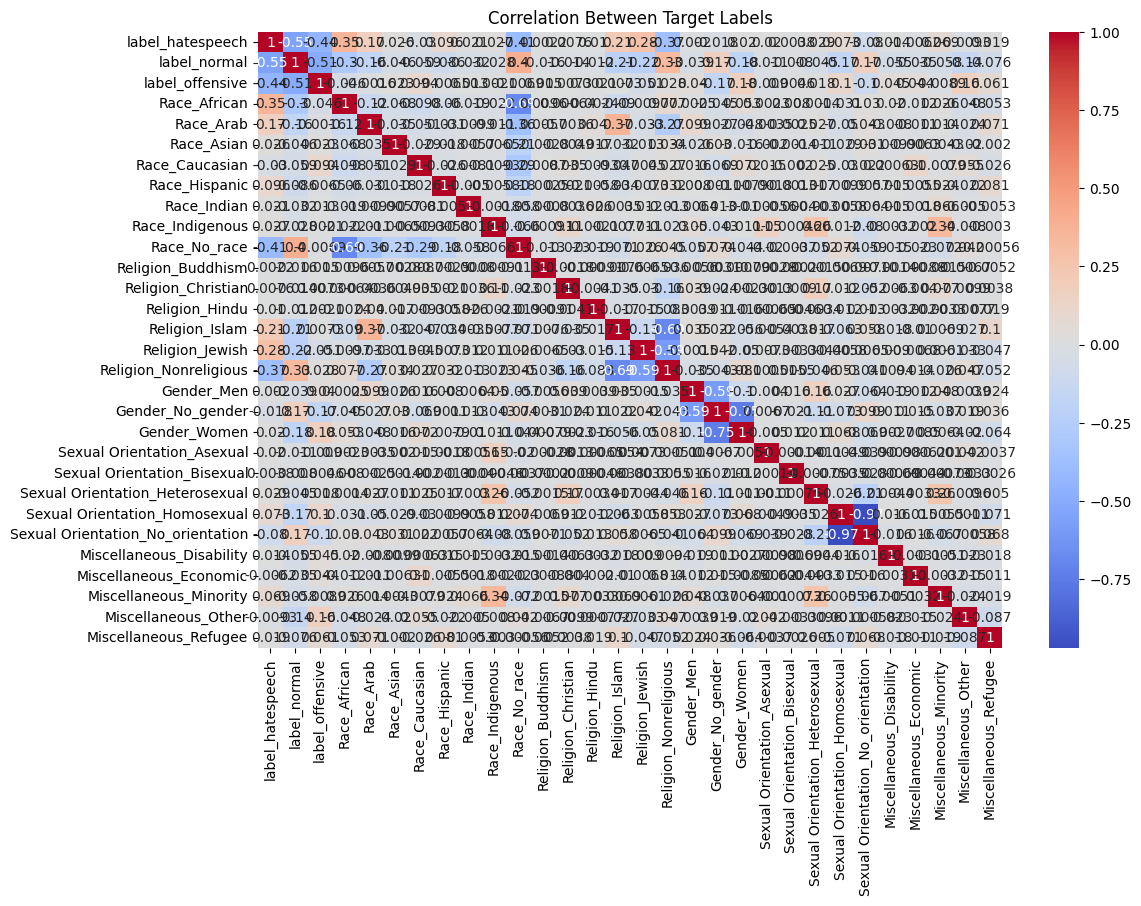

                                             comment  \
0                     0 u0 lmao wow fuck you too 😂 😂   
1  1 0 th floor maybe wow cnn with the fakenews t...   
2  1 0 yrs <number> white women raped by niggers ...   
3  1 2 h ago ching chong accepted your friend req...   
4  1 8 th century mayhem and lawlessness had noth...   

                                          clean_text  
0                                    u lmao wow fuck  
1  th floor maybe wow cnn fakenews body count goi...  
2  yr number white woman raped nigger number negr...  
3          h ago ching chong accepted friend request  
4  th century mayhem lawlessness nothing loud mou...  
Shape of feature matrix X (TF-IDF): (20109, 5000)
Shape of target matrix y: (20109, 30)
X_train shape: (16087, 5000)
X_test shape: (4022, 5000)
y_train shape: (16087, 30)
y_test shape: (4022, 30)
Accuracy: 0.24888115365489807
Classification Report:
                                    precision    recall  f1-score   support

       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Importing required libraries
import pandas as pd
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# 1. LOAD AND INSPECT THE DATA
df = pd.read_csv('/content/final_hateXplain.csv')

# Basic data insights
print("Data Shape:", df.shape)  # Check the number of rows and columns
print("Column Names:", df.columns)  # Check all the column names
print(df.head())  # Look at the first few rows

# Checking for missing values in the dataset
print("Missing Values:\n", df.isnull().sum())

# 2. EXPLORATORY DATA ANALYSIS (EDA)

# 2.1. Distribution of Labels

# Plotting distribution of the 'label' column (normal, offensive, hate speech)
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title("Distribution of Label Types")
plt.show()

# Analyze the distribution of other target columns like 'Race', 'Religion', etc.
plt.figure(figsize=(12, 6))
sns.countplot(x='Race', data=df)
plt.title("Distribution of Race Labels")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Religion', data=df)
plt.title("Distribution of Religion Labels")
plt.show()

# 2.2. Analyze the Length of Comments
df['comment_length'] = df['comment'].apply(lambda x: len(x.split()))  # Calculate word count for each comment
plt.figure(figsize=(10, 6))
sns.histplot(df['comment_length'], bins=30, kde=True)
plt.title("Distribution of Comment Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# 2.3. Correlation Between Labels (Multi-label correlation)
# One-hot encode the target columns to analyze correlation
target_columns = ['label', 'Race', 'Religion', 'Gender', 'Sexual Orientation', 'Miscellaneous']
target_df = pd.get_dummies(df[target_columns])

# Plot the correlation matrix for multi-label correlation
plt.figure(figsize=(12, 8))
sns.heatmap(target_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Target Labels")
plt.show()

# 3. TEXT PREPROCESSING

# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and preprocess the text
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I | re.A)

    # Tokenize text
    tokens = nltk.word_tokenize(text)

    # Lemmatize and remove stopwords
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]

    return ' '.join(tokens)

# Apply the preprocessing function to the 'comment' column
df['clean_text'] = df['comment'].apply(preprocess_text)

# Show the cleaned text
print(df[['comment', 'clean_text']].head())

# 4. TEXT VECTORIZATION (TF-IDF)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to the top 5000 words

# Convert the cleaned text to a feature matrix
X = tfidf.fit_transform(df['clean_text']).toarray()

# Check the shape of the feature matrix
print("Shape of feature matrix X (TF-IDF):", X.shape)

# 5. TARGET PREPARATION (MULTI-LABEL)

# One-hot encode the multi-label columns ('label', 'Race', etc.)
y = pd.get_dummies(df[target_columns])

# Check the shape of the target matrix
print("Shape of target matrix y:", y.shape)

# 6. SPLIT DATA INTO TRAINING AND TESTING SETS

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# 7. MODEL BUILDING: LOGISTIC REGRESSION

# Initialize the model with OneVsRestClassifier using Logistic Regression
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# 8. MODEL EVALUATION

# Evaluate the model with accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate using classification report (precision, recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_df.columns))



In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
453/453 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.0023 - loss: 0.3817 - val_accuracy: 6.2150e-04 - val_loss: 0.1963
Epoch 2/5
453/453 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.0039 - loss: 0.1778 - val_accuracy: 0.0093 - val_loss: 0.1686
Epoch 3/5
453/453 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0172 - loss: 0.1392 - val_accuracy: 0.0131 - val_loss: 0.1678
Epoch 4/5
453/453 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.0215 - loss: 0.1209 - val_accuracy: 0.0186 - val_loss: 0.1749
Epoch 5/5
453/453 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.0200 - loss: 0.1020 - val_accuracy: 0.0193 - val_loss: 0.1849
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0121 - loss: 0.1914
Neural Network Accuracy: 0.014420686289668083


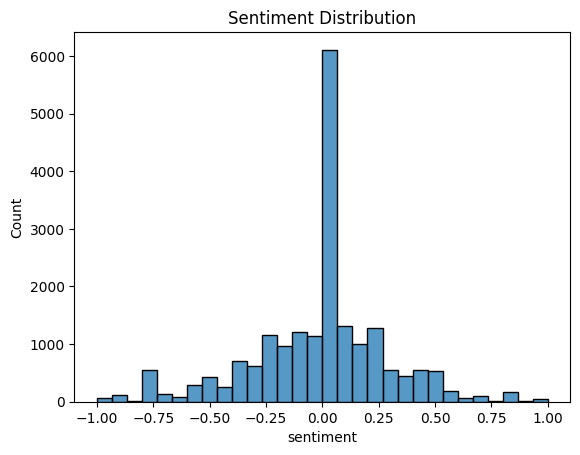

In [ ]:
from textblob import TextBlob

# Function to get sentiment polarity (-1 is negative, 1 is positive)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to all comments
df['sentiment'] = df['comment'].apply(get_sentiment)

# Display sentiment scores
df[['comment', 'sentiment']].head()

# You can also visualize the sentiment distribution
import seaborn as sns
sns.histplot(df['sentiment'], bins=30)
plt.title('Sentiment Distribution')
plt.show()

# From this, you can see how the comments are classified:

# Negative comments (e.g., insults) have a negative polarity (closer to -1).
#Positive comments (e.g., compliments) have a positive polarity (closer to 1).
#Neutral comments (e.g., indifferent statements) have a neutral polarity (around 0).


# GET CSV FROM THE USER AND PROCESS IT

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 1. Load the CSV file (interactive method or file input)
def load_data(file_path=None):
    if not file_path:
        from google.colab import files
        uploaded = files.upload()
        file_path = next(iter(uploaded))
    return pd.read_csv(file_path)

# 2. Preprocessing Function
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Clean the text: lowercase, remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Tokenize and lemmatize
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# 3. Apply preprocessing to the dataset
def preprocess_data(data):
    # Handle missing values in 'comment' column
    data['comment'] = data['comment'].fillna('')  # or data.dropna(subset=['comment']) if you want to remove them
    data['cleaned_comment'] = data['comment'].apply(preprocess_text)
    return data

# 4. Multi-label encoding
def encode_labels(data):
    mlb = MultiLabelBinarizer()
    # Convert all values to strings to avoid mixed types
    data['multi_labels'] = data[['Race', 'Religion', 'Gender', 'Sexual Orientation', 'Miscellaneous']].applymap(str).values.tolist()
    y = mlb.fit_transform(data['multi_labels'])
    return y, mlb

# 5. Extract features using TF-IDF
def extract_features(data):
    tfidf = TfidfVectorizer(max_features=5000)
    X = tfidf.fit_transform(data['cleaned_comment']).toarray()
    return X, tfidf

# 6. Train-Test Split
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Build and Evaluate the Model
def build_model(X_train, y_train, X_test, y_test):
    # Use OneVsRestClassifier for multi-label classification
    model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# 8. Main function to handle the entire workflow
def main(file_path=None):
    # Step 1: Load the data
    data = load_data(file_path)

    # Step 2: Preprocess the text
    data = preprocess_data(data)

    # Step 3: Encode labels
    y, mlb = encode_labels(data)

    # Step 4: Extract features
    X, tfidf = extract_features(data)

    # Step 5: Split data
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Step 6: Build and evaluate the model
    build_model(X_train, y_train, X_test, y_test)

# Running the full process
if __name__ == "__main__":
    # Provide a file path if needed, or leave it blank for interactive file upload
    main(file_path=None)  # Or use main('path_to_your_file.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Saving final_hateXplain.csv to final_hateXplain (4).csv


<ipython-input-34-10a9ac5ce54c>:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data['multi_labels'] = data[['Race', 'Religion', 'Gender', 'Sexual Orientation', 'Miscellaneous']].applymap(str).values.tolist()


Accuracy: 0.399801093983093
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.54      0.66       778
           1       0.76      0.13      0.22       254
           2       0.00      0.00      0.00         1
           3       0.75      0.18      0.29        66
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.42      0.07      0.12       161
           7       0.00      0.00      0.00        31
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00        26
          11       0.00      0.00      0.00         8
          12       0.82      0.12      0.21        73
          13       0.80      0.49      0.61       467
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         8
          16       0.78      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
